<a id="toc"></a>
# Preliminary Visuals

## Table of Contents

- [Main Dataframe and Modified Dataframes that were Used](#md)
- [Different Injury Types Visuals](#di)
- [Recovery Time Visuals](#rt)
- [Team Injuries Visuals](#ti)
- [Multiple Injuries vs One Injury Visuals](#mi)
- [Multiple Injuries vs One Injury by Age Group Visuals](#mia)
- [Players with Multiple Injuries vs One Injury by Age Group Visuals](#pmi)
- [Player Ratings Visuals](#pr)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
from highlight_text import ax_text
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import squarify
import circlify

<a id="MD"></a>
# Main Dataframe and Modified Dataframes that were Used

In [4]:
latest_season = pd.read_csv('latest_season.csv')
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.max_rows', None)      # Limit number of rows shown
pd.set_option('display.width', 1000)       # Width of the display in characters

In [5]:
latest_season

Name    Team Name              Position  Age   Season  FIFA Rating                    Injury Date of Injury Date of Return  Length of Injury in Days  3 Matches Before Injury Player Rating  2 Matches Before Injury Player Rating  1 Match Before Injury Player Rating  Average Rating Before Injury  1 Match After Injury Player Rating  2 Matches After Injury Player Rating  3 Matches After Injury Player Rating  Average Rating After Injury
0           Jamaal Lascelles    Newcastle           Center Back   30  2023/24           76            Unknown Injury     2023-12-23     2024-01-01                         9                                    4.9                                    7.5                                  6.1                      6.166667                                 NaN                                   NaN                                   NaN                          NaN
1               Fabian Schär    Newcastle           Center Back   32  2023/24           82          Hamstring Injury     2024-04-27     2024-05-15                        18                                    7.8                                    5.8                                  5.9                      6.500000                                 5.6                                   5.7                                   NaN                     5.650000
2                  Joelinton    Newcastle    Central Midfielder   27  2023/24           82          Hamstring Injury     2023-09-13     2023-10-15                        32                                    6.0                                    6.8                                  6.3                      6.366667                                 6.5                                   6.8                                   7.8                     7.033333
3                  Joelinton    Newcastle    Central Midfielder   27  2023/24           82          Hamstring Injury     2023-12-16     2023-12-25                         9                                    7.0                                    7.0                                  5.6                      6.533333                                 5.8                                   6.6                                   NaN                     6.200000
4                  Joelinton    Newcastle    Central Midfielder   27  2023/24           82              Groin Injury     2024-01-06     2024-05-03                       118                                    5.8                                    6.6                                  NaN                      6.200000                                 6.0                                   6.0                                   7.0                     6.333333
5             Sean Longstaff    Newcastle    Central Midfielder   26  2023/24           77              Ankle Injury     2023-11-11     2023-12-08                        27                                    6.5                                    6.5                                  5.9                      6.300000                                 5.7                                   6.8                                   6.0                     6.166667
6             Miguel Almirón    Newcastle          Right Winger   30  2023/24           79               Knee Injury     2024-03-30     2024-05-03                        34                                    6.2                                    6.3                                  6.3                      6.266667                                 6.0                                   6.2                                   5.6                     5.933333
7                Joe Willock    Newcastle    Central Midfielder   24  2023/24           78          Hamstring Injury     2023-08-01     2023-10-23                        83                                    NaN                                    NaN                                  NaN                           NaN                                 6.

In [6]:
below27 = latest_season['Age'] < 27
under27 = latest_season.loc[below27, :]

In [7]:
above27 = latest_season['Age'] >= 27
above_equal27 = latest_season.loc[above27, :]

In [8]:
name_counts = latest_season['Name'].value_counts()

In [9]:
names_once = name_counts[name_counts == 1].index
one_injury = latest_season[latest_season['Name'].isin(names_once)]

In [10]:
names_many = name_counts[name_counts > 1].index
more_than_one_injury = latest_season[latest_season['Name'].isin(names_many)]

[Back to Table of Contents](#toc)

<a id="di"></a>

# Different Injury Types Visuals

In [13]:
injury_count = latest_season['Injury'].value_counts()

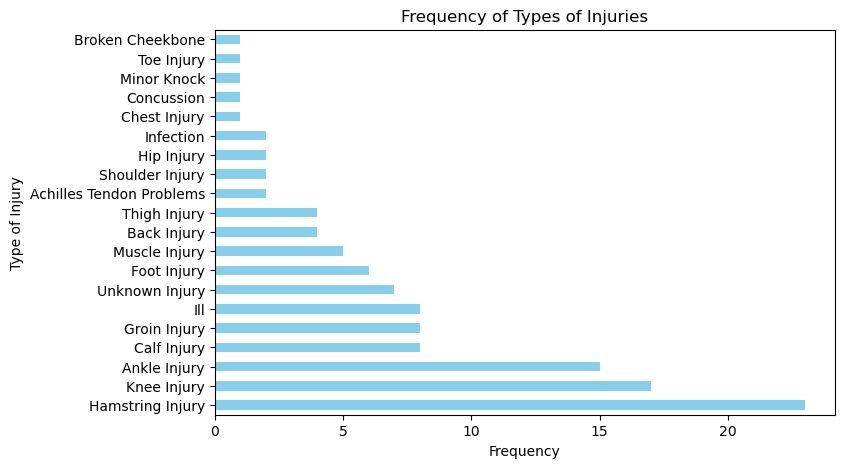

In [14]:
plt.figure(figsize=(8, 5))
injury_count.plot(kind='barh', color='skyblue')
plt.ylabel('Type of Injury')
plt.xlabel('Frequency')
plt.title('Frequency of Types of Injuries')
plt.show()

In [15]:
under27_injury_count = under27['Injury'].value_counts()

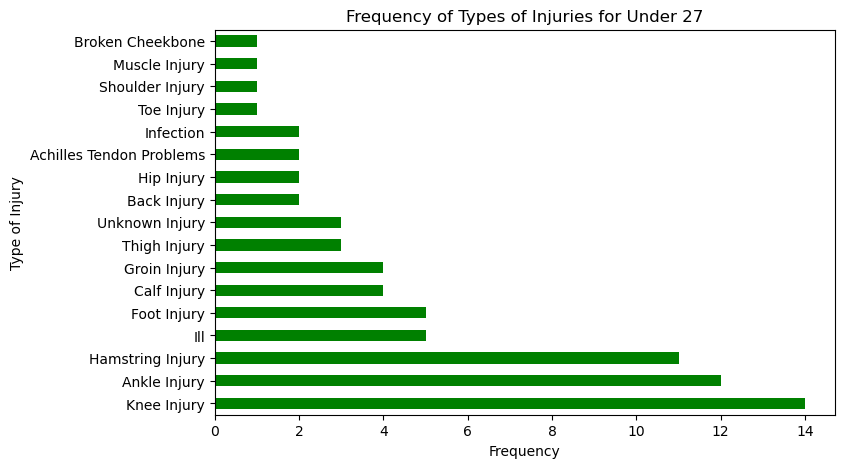

In [16]:
plt.figure(figsize=(8, 5))
under27_injury_count.plot(kind='barh', color='green')
plt.ylabel('Type of Injury')
plt.xlabel('Frequency')
plt.title('Frequency of Types of Injuries for Under 27')
plt.show()

In [17]:
above27_injury_count = above_equal27['Injury'].value_counts()

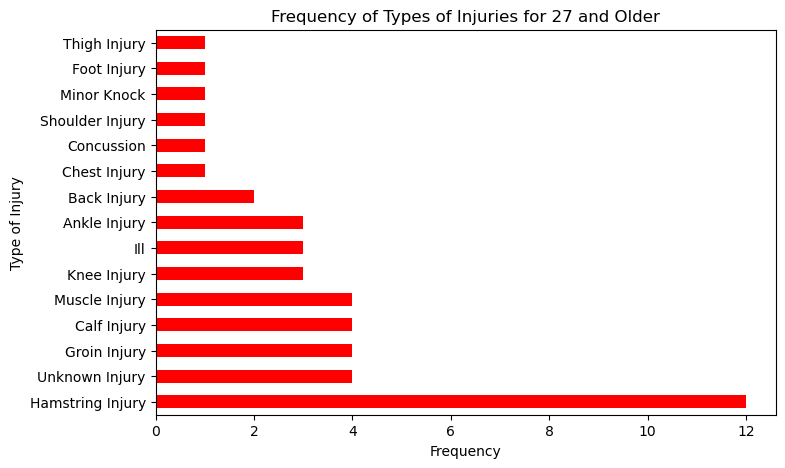

In [18]:
plt.figure(figsize=(8, 5))
above27_injury_count.plot(kind='barh', color='red')
plt.ylabel('Type of Injury')
plt.xlabel('Frequency')
plt.title('Frequency of Types of Injuries for 27 and Older')
plt.show()

In [19]:
injury_data = pd.DataFrame({
    'All Injuries': injury_count,
    '27 and Older': above27_injury_count,
    'Under 27': under27_injury_count
}).fillna(0) 
sorted_injury_data = injury_data.sort_values("All Injuries", ascending=False)

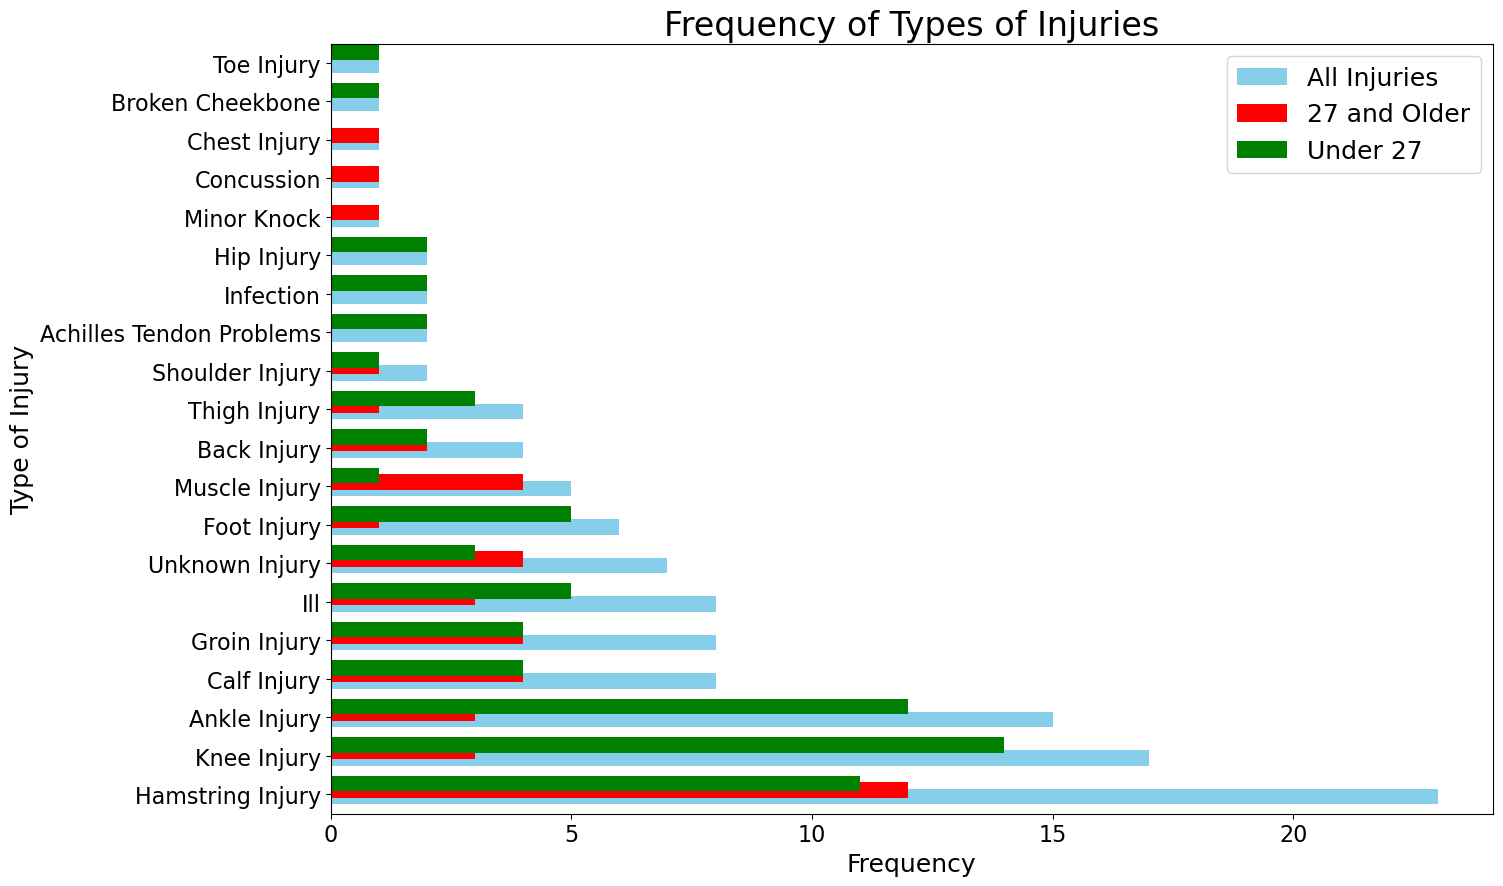

In [20]:
ax = sorted_injury_data.plot(
    kind='barh',
    figsize=(15, 10),        # Set the figure size
    stacked=False,
    color=['skyblue', 'red', 'green']
)
# Loop over each bar (patch) and set a new height for thicker bars
for bar in ax.patches:
    bar.set_height(0.4)      # Adjust the thickness as needed
# Set the axis labels and title with custom font sizes
ax.set_ylabel('Type of Injury', fontsize=18)   # Y-axis label font size
ax.set_xlabel('Frequency', fontsize=18)         # X-axis label font size
ax.set_title('Frequency of Types of Injuries', fontsize=24) # Title font size
# Adjust tick label sizes for both axes
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(fontsize=18)
plt.show()

[Back to Table of Contents](#toc)

<a id="rt"></a>

# Recovery Time Visuals

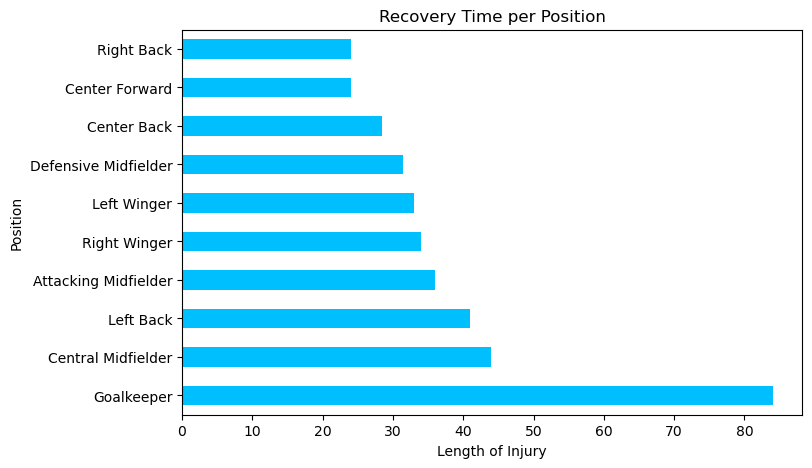

In [23]:
plt.figure(figsize=(8, 5))
latest_season.groupby('Position')['Length of Injury in Days'].median().sort_values(ascending = False).plot.barh(color = '#00bfff')
plt.ylabel('Position')
plt.xlabel('Length of Injury')
plt.title('Recovery Time per Position')
plt.show()

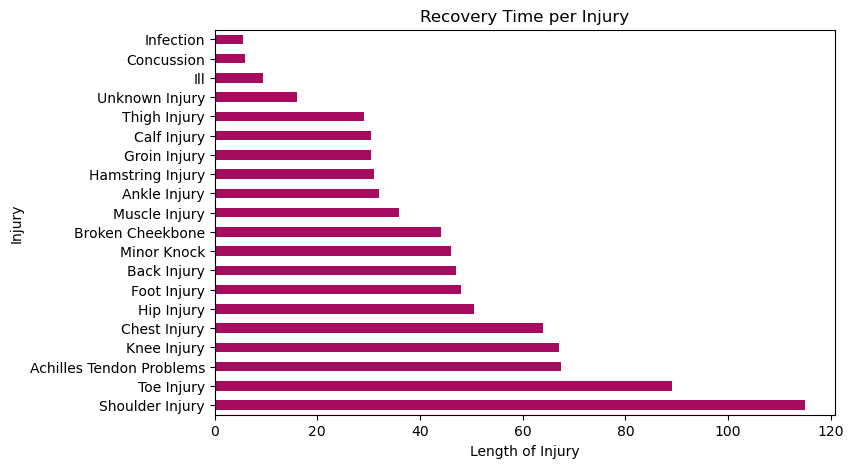

In [24]:
plt.figure(figsize=(8, 5))
latest_season.groupby('Injury')['Length of Injury in Days'].median().sort_values(ascending = False).plot.barh(color = '#a50b5e')
plt.ylabel('Injury')
plt.xlabel('Length of Injury')
plt.title('Recovery Time per Injury')
plt.show()

In [25]:
under27_injury_length = under27['Length of Injury in Days']
above27_injury_length = above_equal27['Length of Injury in Days']

In [26]:
above27_injury_length
under27_injury_length

# Perform a paired t-test
F_statistic, p_value = stats.f_oneway(above27_injury_length, under27_injury_length)

# Get means
mean_above27_injury_length = above27_injury_length.mean()
mean_under27_injury_length = under27_injury_length.mean()

print("T-statistic:", F_statistic)
print("P-value:", p_value)
print("Mean of Length of Injury for 27 and Older:", mean_above27_injury_length)
print("Mean of Length of Injury for Under 27:", mean_under27_injury_length)

T-statistic: 2.8005446693938962
P-value: 0.09692690587023221
Mean of Length of Injury for 27 and Older: 44.75555555555555
Mean of Length of Injury for Under 27: 70.93150684931507


In [27]:
F_statistic = round(F_statistic,2)
p_value = round(p_value,5) # more decimal since it's a lower value in general
mean_above27_injury_length = round(mean_above27_injury_length,2)
mean_under27_injury_length = round(mean_under27_injury_length,2)

In [28]:
# Create the figure
bp1 = go.Figure()

# Add boxplot
bp1.add_trace(go.Box(
    y=above27_injury_length,
    boxmean='sd',  # Display the mean and standard deviation
    name='27 and Older',  # Category label
    marker_color='#7d26cd',  # Set box color
    line_color='#7d26cd',  # Line color
))

# Add title and labels
bp1.update_layout(
    title='Length of Injury for 27 and Older',
    yaxis_title='Length of Injury in Days',

    # Set the dimensions of the figure
    width=700,  # Set the width of the figure (in pixels)
    height=700,  # Set the height of the figure (in pixels)
)

# Show plot
bp1.show()

In [29]:
bp2 = px.box(above27_injury_length, y="Length of Injury in Days")
bp2.update_layout(
    title='Length of Injury for 27 and Older',
    yaxis_title='Length of Injury in Days',
    xaxis_title='27 and Older',
    width=800,  # Set the width of the figure (in pixels)
    height=800,  # Set the height of the figure (in pixels)
)

# Change the color of the boxplot
bp2.update_traces(
    marker=dict(color='#7d26cd'),  # Set the color of the boxplot
    line=dict(color='#7d26cd'),        # Set the color of the whiskers and box outline
)

bp2.show()

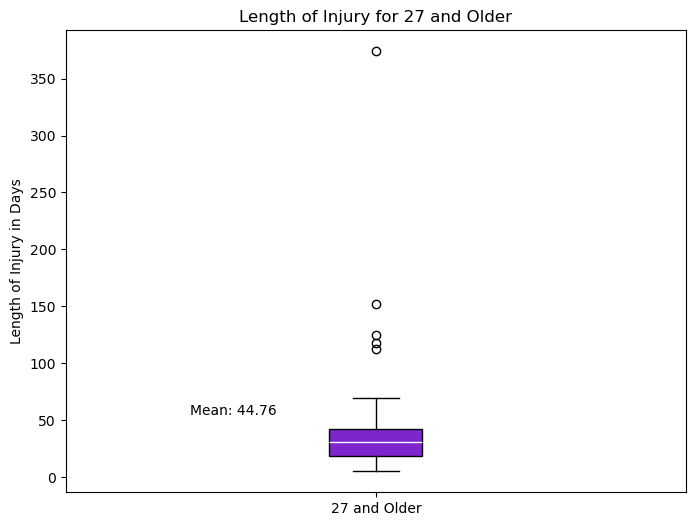

In [30]:
# Init a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
boxplot1 = ax.boxplot(above27_injury_length,
                     patch_artist=True,
                     medianprops={'color': 'white'},
                    ) 

# Define colors for each group
colors = ['#7d26cd']

# Assign colors to each box in the boxplot
for box, color in zip(boxplot1['boxes'], colors):
    box.set_facecolor(color)

ax.text(.7, mean_above27_injury_length + 10, f'Mean: {mean_above27_injury_length}', fontsize=10)

# Add a title and axis label
ax.set_title('Length of Injury for 27 and Older')
ax.set_ylabel('Length of Injury in Days')

# Change x-axis labels to categories
ax.set_xticklabels(['27 and Older'])

# Display it
plt.show()

In [31]:
# Create the figure
bp3 = go.Figure()

# Add boxplot
bp3.add_trace(go.Box(
    y=under27_injury_length,
    boxmean='sd',  # Display the mean and standard deviation
    name='Under 27',  # Category label
    marker_color='#01796f',  # Set box color
    line_color='#01796f',  # Line color
))

# Add title and labels
bp3.update_layout(
    title='Length of Injury for Under 27',
    yaxis_title='Length of Injury in Days',

    # Set the dimensions of the figure
    width=800,  # Set the width of the figure (in pixels)
    height=800,  # Set the height of the figure (in pixels)
)

# Show plot
bp3.show()

In [32]:
bp4 = px.box(under27_injury_length, y="Length of Injury in Days")
bp4.update_layout(
    title='Length of Injury for Under 27',
    yaxis_title='Length of Injury in Days',
    xaxis_title='Under 27',
    width=800,  # Set the width of the figure (in pixels)
    height=800,  # Set the height of the figure (in pixels)
)

# Change the color of the boxplot
bp4.update_traces(
    marker=dict(color='#01796f'),  # Set the color of the boxplot
    line=dict(color='#01796f'),        # Set the color of the whiskers and box outline
)

bp4.show()

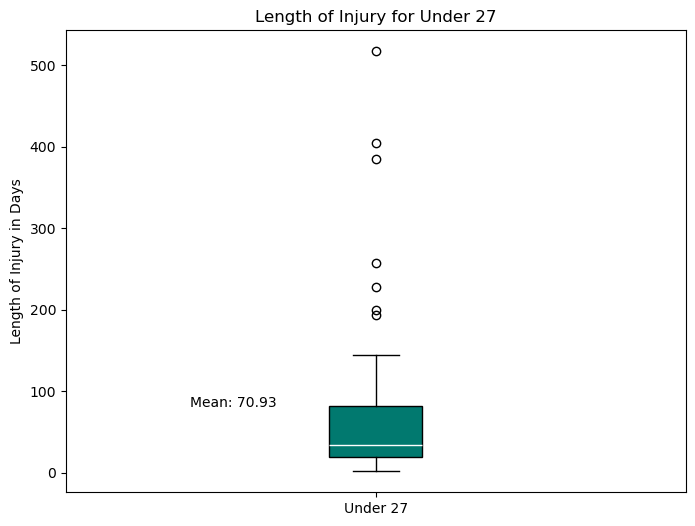

In [33]:
# Init a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
boxplot2 = ax.boxplot(under27_injury_length,
                     patch_artist=True,
                     medianprops={'color': 'white'},
                    ) 

# Define colors for each group
colors = ['#01796f']

# Assign colors to each box in the boxplot
for box, color in zip(boxplot2['boxes'], colors):
    box.set_facecolor(color)

ax.text(.7, mean_under27_injury_length + 10, f'Mean: {mean_under27_injury_length}', fontsize=10)

# Add a title and axis label
ax.set_title('Length of Injury for Under 27')
ax.set_ylabel('Length of Injury in Days')

# Change x-axis labels to categories
ax.set_xticklabels(['Under 27'])

# Display it
plt.show()

In [34]:
# Create the figure
bp5 = go.Figure()

# Add boxplot
bp5.add_trace(go.Box(
    y=latest_season[latest_season['Age'] >= 27]['Length of Injury in Days'],  # Data for 27 and older
    x=['27 and Older'] * len(latest_season[latest_season['Age'] >= 27]),  # Categorical x-axis
    boxmean='sd',  # Display the mean and standard deviation
    name='27 and Older',  # Category label
    marker_color='#1ca9c9',  # Set box color
    line_color='#1ca9c9',  # Line color
))

bp5.add_trace(go.Box(
    y=latest_season[latest_season['Age'] < 27]['Length of Injury in Days'],  # Data for under 27
    x=['Under 27'] * len(latest_season[latest_season['Age'] < 27]),  # Categorical x-axis
    boxmean='sd',  # Display the mean and standard deviation
    name='Under 27',  # Category label
    marker_color='#cd1076',  # Set box color
    line_color='#cd1076',  # Line color
))

# Add title and labels
bp5.update_layout(
    title='Length of Injury by Age Group',
    yaxis_title='Length of Injury in Days',
    
    #template='dark'  # Optional: change theme to dark (or leave it as is)

    # Set the dimensions of the figure
    width=800,  # Set the width of the figure (in pixels)
    height=800,  # Set the height of the figure (in pixels)
)

# Show plot
bp5.show()

In [35]:
trace_1 = go.Box(
    y=latest_season[latest_season['Age'] >= 27]['Length of Injury in Days'],
    name='27 and Older',
    marker=dict(color='#1ca9c9'),  # Color for this box
    line=dict(color='#1ca9c9')     # Color of line
)

trace_2 = go.Box(
    y=latest_season[latest_season['Age'] < 27]['Length of Injury in Days'],
    name='Under 27',
    marker=dict(color='#cd1076'),  # Color for this box
    line=dict(color='#cd1076')     # Color of line
)

bp6 = go.Figure(data=[trace_1, trace_2])


bp6.update_layout(
    title='Length of Injury by Age Group',
    yaxis_title='Length of Injury in Days',
    width=800,  # Set the width of the figure (in pixels)
    height=1000,  # Set the height of the figure (in pixels)
)

bp6.show()

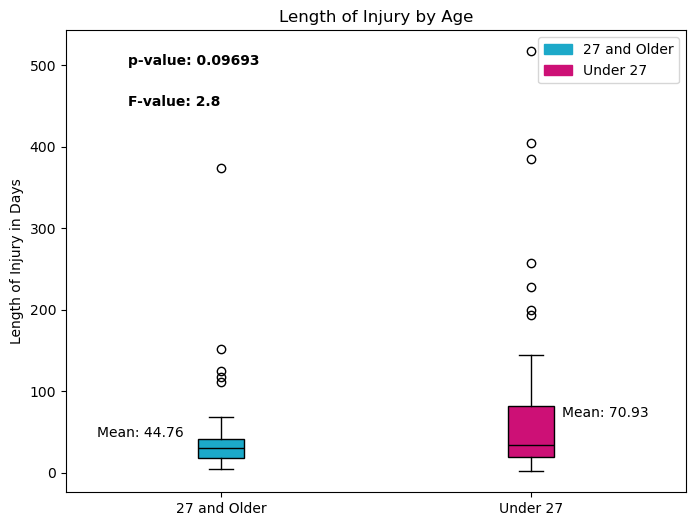

In [36]:
# Init a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot for 27 and Older group
boxplot_1 = ax.boxplot(latest_season[latest_season['Age'] >= 27]['Length of Injury in Days'],
                       positions=[1],  # Specify position on x-axis
                       patch_artist=True,
                       medianprops={'color': 'black'}
                      )

# Create the plot for Under 27 group
boxplot_2 = ax.boxplot(latest_season[latest_season['Age'] < 27]['Length of Injury in Days'],
                       positions=[2],  # Specify position on x-axis
                       patch_artist=True,
                       medianprops={'color': 'black'}
                      )

# Define colors for each group
colors = ['#1ca9c9', '#cd1076']

# Assign colors to each box in the boxplot
for box, color in zip([boxplot_1['boxes'][0], boxplot_2['boxes'][0]], colors):
    box.set_facecolor(color)

# Add the p value and the t-statistic (replace with actual values)
p_value_text = f'p-value: {p_value}'
ax.text(0.7, 500, p_value_text, weight='bold')
f_value_text = f'F-value: {F_statistic}'
ax.text(0.7, 450, f_value_text, weight='bold')

# Add the mean for each group (replace with actual mean values)
ax.text(0.6, mean_above27_injury_length - 1, f'Mean: {mean_above27_injury_length}', fontsize=10)
ax.text(2.1, mean_under27_injury_length - 2, f'Mean: {mean_under27_injury_length}', fontsize=10)

# Add a title and axis label
ax.set_title('Length of Injury by Age')
ax.set_ylabel('Length of Injury in Days')

# Change x-axis labels to categories
ax.set_xticklabels(['27 and Older', 'Under 27'])

# Add a legend
legend_labels = ['27 and Older', 'Under 27']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels)

# Display the plot
plt.show()

[Back to Table of Contents](#toc)

<a id="ti"></a>

# Team Injuries Visuals

In [39]:
# Group the data by 'Age' and 'Team Name' to count injuries per team and age
injuries_per_age1 = latest_season.groupby(['Age', 'Team Name']).size().reset_index(name='Injuries')

# Create the bubble plot using Plotly
fig = px.scatter(
    injuries_per_age1, 
    x='Age', 
    y='Injuries', 
    size='Injuries', 
    color='Team Name', 
    hover_name='Team Name',
    size_max=50,  # Adjust the maximum size of the bubbles
    title="Bubble Plot: Injuries per Team and Age",
    labels={'Age': 'Player Age', 'Injuries': 'Number of Injuries'}
)

# Show the plot
fig.show()

In [40]:
# Group the data by 'Age' and 'Team Name' to count injuries per team and age
average_age_per_team = latest_season.groupby('Team Name').agg(
    Average_Age=('Age', 'mean'),
    Injuries=('Injury', 'count')
).reset_index()

# Create the bubble plot using Plotly
fig = px.scatter(
    average_age_per_team, 
    x='Average_Age', 
    y='Injuries', 
    size='Injuries', 
    color='Team Name', 
    hover_name='Team Name',
    size_max=50,  # Adjust the maximum size of the bubbles
    title="Bubble Plot: Injuries per Team and Age",
    labels={'Average_Age': 'Average Age', 'Injuries': 'Number of Injuries'}
)

# Show the plot
fig.show()

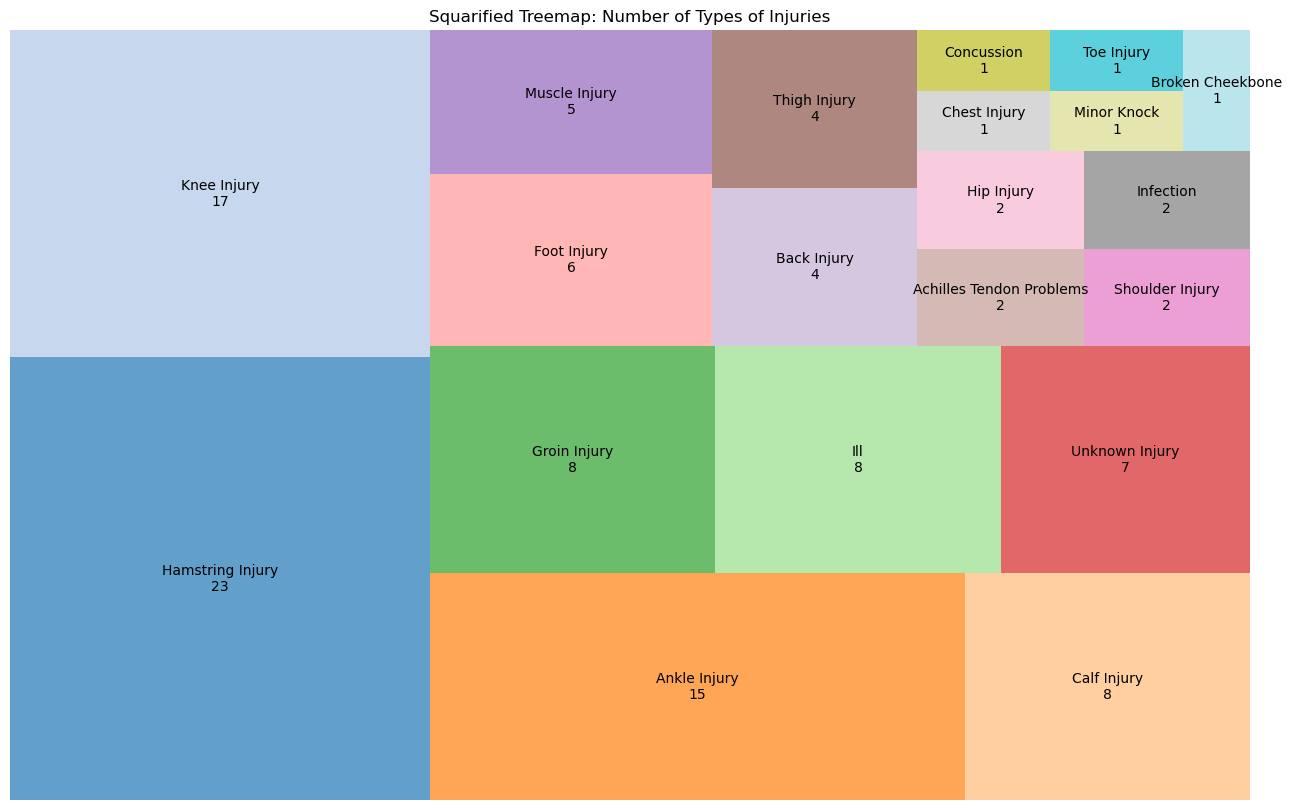

In [41]:
# Group by injury type and count occurrences
injury_counts3 = latest_season['Injury'].value_counts().reset_index()
injury_counts3.columns = ['Injury', 'Count']

# Define a color map with distinct colors
num_colors = len(injury_counts3)
colors = plt.cm.tab20.colors  # Use a built-in colormap with distinct colors (or choose another)

# If there are more injury types than colors in tab20, we can cycle through the colors
if num_colors > len(colors):
    color_cycle = np.resize(colors, num_colors)
else:
    color_cycle = colors[:num_colors]

# Set up the figure
fig, ax = plt.subplots(figsize=(16, 10))

# Create squarified layout
squarify.plot(
    sizes=injury_counts3['Count'], 
    label=injury_counts3['Injury'] + '\n' + injury_counts3['Count'].astype(str),  # Add a newline between injury type and count
    color=color_cycle,
    alpha=0.7, 
    ax=ax
)

# Add title
plt.title("Squarified Treemap: Number of Types of Injuries")

# Remove axes
plt.axis('off')

# Show the plot
plt.show()

[Back to Table of Contents](#toc)

<a id="mi"></a>

# Multiple Injuries vs One Injury Visuals

In [44]:
injury1 = more_than_one_injury['Injury'].value_counts()
injury2 = one_injury['Injury'].value_counts()

<Figure size 2000x1500 with 0 Axes>

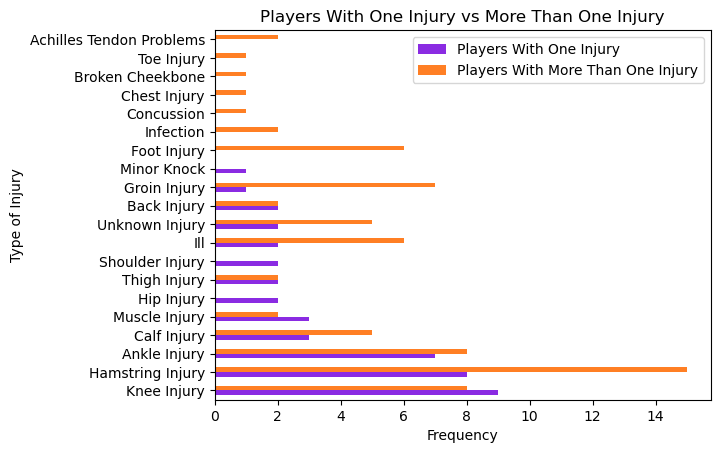

In [45]:
multiple_injuries_vs_one = pd.DataFrame({
    'Players With One Injury': injury2,
    'Players With More Than One Injury': injury1
}).fillna(0).sort_values("Players With One Injury", ascending=False)

plt.figure(figsize=(20, 15))
multiple_injuries_vs_one.plot(kind='barh', stacked=False, color=['#8a2be2', '#ff7f24'])

plt.ylabel('Type of Injury')
plt.xlabel('Frequency')
plt.title('Players With One Injury vs More Than One Injury')
plt.show()

<Figure size 2000x1500 with 0 Axes>

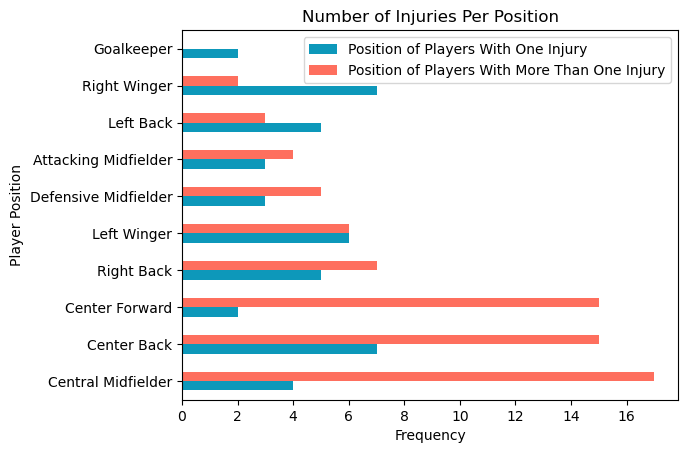

In [46]:
position1 = more_than_one_injury['Position'].value_counts()
position2 = one_injury['Position'].value_counts()

player_positions = pd.DataFrame({
    'Position of Players With One Injury': position2,
    'Position of Players With More Than One Injury': position1
}).fillna(0).sort_values("Position of Players With More Than One Injury", ascending=False)

plt.figure(figsize=(20, 15))
player_positions.plot(kind='barh', stacked=False, color=['#0d98ba', '#fe6f5e'])

plt.ylabel('Player Position')
plt.xlabel('Frequency')
plt.title('Number of Injuries Per Position')
plt.show()

[Back to Table of Contents](#toc)

<a id="mia"></a>

# Multiple Injuries vs One Injury by Age Group Visuals

In [49]:
injury_age1 = more_than_one_injury[more_than_one_injury['Age'] >= 27]
injury_age2 = more_than_one_injury[more_than_one_injury['Age'] < 27]
injury_age3 = one_injury[one_injury['Age'] >= 27]
injury_age4 = one_injury[one_injury['Age'] < 27]

<Figure size 1500x1000 with 0 Axes>

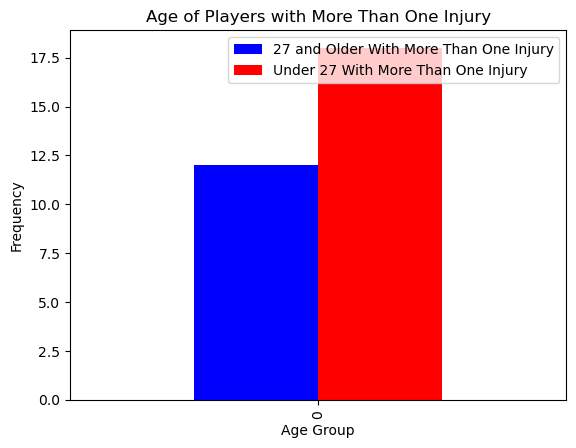

In [50]:
number_injury_and_age = pd.DataFrame({
    '27 and Older With More Than One Injury': [len(injury_age1.groupby('Name').count())],
    'Under 27 With More Than One Injury': [len(injury_age2.groupby('Name').count())]
}).fillna(0)

plt.figure(figsize=(15, 10))
number_injury_and_age.plot(kind='bar', stacked=False, color=['blue', 'red'])

plt.ylabel('Frequency')
plt.xlabel('Age Group')
plt.title('Age of Players with More Than One Injury')
plt.show()

<Figure size 1500x1000 with 0 Axes>

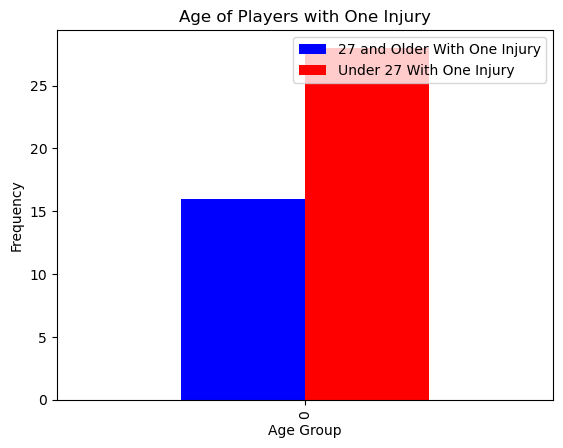

In [51]:
injury_and_age = pd.DataFrame({
    '27 and Older With One Injury': [len(injury_age3.groupby('Name').count())],
    'Under 27 With One Injury': [len(injury_age4.groupby('Name').count())]
}).fillna(0)

plt.figure(figsize=(15, 10))
injury_and_age.plot(kind='bar', stacked=False, color=['blue', 'red'])

plt.ylabel('Frequency')
plt.xlabel('Age Group')
plt.title('Age of Players with One Injury')
plt.show()

(0.0, 30.0)

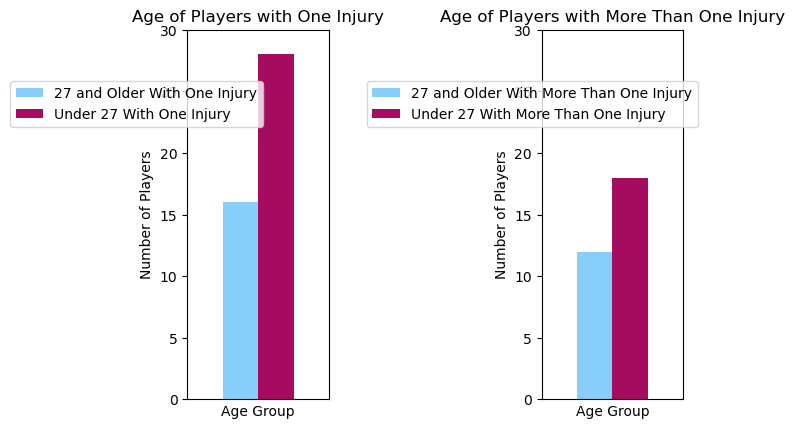

In [52]:
#Make 4 plots in 1
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(wspace=1.5)

#add DataFrames to subplots
injury_and_age.plot(kind='bar', stacked=False, color=['#87cefa', '#a50b5e'], ax=axes[0])

axes[0].set_ylabel('Number of Players')
axes[0].set_xlabel('Age Group')
axes[0].set_title('Age of Players with One Injury')
axes[0].legend(loc='center left', bbox_to_anchor=(-1.3, 0.8))
axes[0].set_xticks([])
axes[0].set_ylim(0, 30)

number_injury_and_age.plot(kind='bar', stacked=False, color=['#87cefa', '#a50b5e'], ax=axes[1])

axes[1].set_ylabel('Number of Players')
axes[1].set_xlabel('Age Group')
axes[1].set_title('Age of Players with More Than One Injury')
axes[1].legend(loc='center right', bbox_to_anchor=(1.15, 0.8))
axes[1].set_xticks([])
axes[1].set_ylim(0, 30)

[Back to Table of Contents](#toc)

<p><a name="pmi"></a></p>

# Players with Multiple Injuries vs One Injury by Age Group Visuals

In [55]:
# First, count the number of injuries for each player
injury_counts = more_than_one_injury.groupby('Name')['Injury'].count()

# Filter for players with more than one injury
players_with_multiple_injuries = injury_counts[injury_counts > 1].index

# Now, filter the original DataFrame based on those players and age condition
filtered_df = more_than_one_injury[
    (more_than_one_injury['Name'].isin(players_with_multiple_injuries)) &
    (more_than_one_injury['Age'] >= 27)
]

In [56]:
# Filter the data by age group (27 and older and under 27)
above_27 = more_than_one_injury[more_than_one_injury['Age'] >= 27]
under_27 = more_than_one_injury[more_than_one_injury['Age'] < 27]

# Group by Name, Injury, and Age to count the occurrences of each injury type for each player
above_27_injury_counts = above_27.groupby(['Name', 'Injury', 'Age']).size().reset_index(name='Injury Count')
under_27_injury_counts = under_27.groupby(['Name', 'Injury', 'Age']).size().reset_index(name='Injury Count')

# Combine both age groups into a single DataFrame
combined_injury_counts = pd.concat([above_27_injury_counts, under_27_injury_counts])

# Optionally, you can filter out injuries that occurred more than once
repeated_injuries = combined_injury_counts[combined_injury_counts['Injury Count'] > 1]

In [57]:
# Filter the data by age group (27 and older and under 27)
one_above_27 = one_injury[one_injury['Age'] >= 27]
one_under_27 = one_injury[one_injury['Age'] < 27]

In [58]:
# Calculate the total injury count for each player and the data for plotting
total_injury_counts_older = above_27_injury_counts.groupby(['Name', 'Injury'])['Injury Count'].sum().reset_index()

# Get the unique injury types
injury_types1 = total_injury_counts_older['Injury'].unique()

# Manually assign colors to each injury type. If there are many types, adjust the color list accordingly.
color_palette = px.colors.qualitative.Set2  # A color set with a larger variety
if len(injury_types1) > len(color_palette):
    color_palette = px.colors.qualitative.Set1  # Fallback to a second set if needed.

# Create a stacked bar plot using Plotly
fig = px.bar(total_injury_counts_older, 
             x='Name', 
             y='Injury Count', 
             color='Injury', 
             title='Injury Counts by Player and Injury Type for 27 and Older', 
             labels={'Name': 'Player Name', 'Injury Count': 'Injury Count'},
             category_orders={'Name': total_injury_counts_older['Name'].unique().tolist()},
             text='Injury Count',  # Display injury counts on bars
             color_discrete_map={injury: color for injury, color in zip(injury_types1, color_palette)})

# Add age labels on top of the stacked bars
# Calculate total injury counts for each player
total_injury_counts_above = above_27_injury_counts.groupby('Name')['Injury Count'].sum().reset_index()

# Map the age of each player to their total injury count
ages1 = above_27_injury_counts.drop_duplicates(subset=['Name'])[['Name', 'Age']]

# Add the age as text on top of the total injury count for each player
for i, row in total_injury_counts_above.iterrows():
    player_name = row['Name']
    total_count = row['Injury Count']
    player_age = ages1[ages1['Name'] == player_name]['Age'].values[0]
    fig.add_annotation(
        x=player_name,
        y=total_count + 0.4,  # Increase the value here to move the age label further up
        text=str(player_age),
        showarrow=False,
        font=dict(size=12, color='black'),
        align='center'
    )

# Update layout for better readability and to adjust the legend
fig.update_layout(
    xaxis_title='Player Name',
    yaxis_title='Injury Count',
    legend_title='Injury Type',
    xaxis_tickangle=-90,  # Rotate player names for readability
    margin=dict(t=50, b=150, r=250, l=100),  # Increase the margin to make space for the legend
    width=800,  # Set the width of the figure (in pixels)
    height=500,  # Set the height of the figure (in pixels)
    legend=dict(
        x=1.05,  # Position the legend outside the plot
        y=1,     # Place the legend at the top
        traceorder='normal', 
        orientation='v',  # Vertical orientation
        title='Injury Type',
        font=dict(size=12),
        borderwidth=1,
        itemclick="toggleothers",  # This ensures better interaction with the legend
        tracegroupgap=5,  # Adds space between legend items
        itemsizing='constant'  # Ensure consistent item size in the legend
    )
)

# Show the plot
fig.show()


In [59]:
# Merge the injury data with the team data
above_27_injury_counts1 = pd.merge(above_27_injury_counts, latest_season, on='Name', how='left')

# Create a new column combining Player and Team for the x-axis
above_27_injury_counts1['Player_Team'] = above_27_injury_counts1['Name'] + ': ' + above_27_injury_counts1['Team Name']


above_27_injury_counts1 = above_27_injury_counts1.drop_duplicates(subset=['Name', 'Injury_x'])

# Recalculate the injury counts by player/team and injury type
total_injury_counts_above1 = above_27_injury_counts1.groupby(['Player_Team', 'Injury_x'])['Injury Count'].sum().reset_index()

# Get the unique injury types for the color mapping
injury_types8 = total_injury_counts_above1['Injury_x'].unique()

# Sort injury types alphabetically
injury_types8_sorted = sorted(injury_types8)

# Manually assign colors to each injury type
color_palette = px.colors.qualitative.Set2  # A color set with a larger variety
if len(injury_types8) > len(color_palette):
    color_palette = px.colors.qualitative.Set1  # Fallback to a second set if needed

# Create the stacked bar plot using Plotly
fig = px.bar(total_injury_counts_above1, 
             x='Player_Team',  # Use Player_Team for x-axis
             y='Injury Count', 
             color='Injury_x', 
             title='Injury Counts by Player and Injury Type for 27 and Older', 
             labels={'Player_Team': 'Player Name (Team)', 'Injury Count': 'Injury Count'},
             category_orders={
                 'Player_Team': total_injury_counts_above1['Player_Team'].unique().tolist(),
                 'Injury_x': injury_types8_sorted  # Sort injury types alphabetically
             },
             text='Injury Count',  # Display injury counts on bars
             color_discrete_map={injury: color for injury, color in zip(injury_types8_sorted, color_palette)})

# Add age labels on top of the stacked bars
# Calculate total injury counts for each player/team
total_injury_counts_above1 = above_27_injury_counts1.groupby('Player_Team')['Injury Count'].sum().reset_index()

# Get the unique player names and ages
ages5 = above_27_injury_counts1.drop_duplicates(subset=['Player_Team'])[['Player_Team', 'Age_x']]

# Add the age as text on top of the total injury count for each player
for i, row in total_injury_counts_above1.iterrows():
    player_team = row['Player_Team']
    total_count = row['Injury Count']
    player_name = player_team.split(' (')[0]  # Extract player name
    player_age = ages5[ages5['Player_Team'] == player_name]['Age_x'].values[0]
    fig.add_annotation(
        x=player_team,
        y=total_count + 0.2,  # Increase the value here to move the age label further up
        text=str(player_age),
        showarrow=False,
        font=dict(size=12, color='black'),
        align='center'
    )

# Update layout for better readability and to adjust the legend
fig.update_layout(
    xaxis_title='Player Name (Team)',
    yaxis_title='Injury Count',
    legend_title='Injury Type',
    xaxis_tickangle=-90,  # Rotate player names for readability
    margin=dict(t=50, b=150, r=250, l=100),  # Increase the margin to make space for the legend
    width=900,  # Set the width of the figure (in pixels)
    height=600,  # Set the height of the figure (in pixels)
    legend=dict(
        x=1.05,  # Position the legend outside the plot
        y=1,     # Place the legend at the top
        traceorder='normal', 
        orientation='v',  # Vertical orientation
        title='Injury Type',
        font=dict(size=12),
        borderwidth=1,
        itemclick="toggleothers",  # This ensures better interaction with the legend
        tracegroupgap=5,  # Adds space between legend items
        itemsizing='constant'  # Ensure consistent item size in the legend
    )
)

# Show the plot
fig.show()


In [60]:
# Calculate the total injury count for each player and the data for plotting
total_injury_counts_under = under_27_injury_counts.groupby(['Name', 'Injury'])['Injury Count'].sum().reset_index()

# Get the unique injury types
injury_types2 = total_injury_counts_under['Injury'].unique()

# Manually assign colors to each injury type
color_palette = px.colors.qualitative.Set2  # A color set with a larger variety
if len(injury_types2) > len(color_palette):
    color_palette = px.colors.qualitative.Set1  # Fallback to a second set if needed

# Create a stacked bar plot using Plotly
fig = px.bar(total_injury_counts_under, 
             x='Name', 
             y='Injury Count', 
             color='Injury', 
             title='Injury Counts by Player and Injury Type for Under 27', 
             labels={'Name': 'Player Name', 'Injury Count': 'Injury Count'},
             category_orders={'Name': total_injury_counts_under['Name'].unique().tolist()},
             text='Injury Count',  # Display injury counts on bars
             color_discrete_map={injury: color for injury, color in zip(injury_types2, color_palette)})

# Add age labels on top of the stacked bars
# Calculate total injury counts for each player
total_injury_counts_under = under_27_injury_counts.groupby('Name')['Injury Count'].sum().reset_index()

# Map the age of each player to their total injury count
ages2 = under_27_injury_counts.drop_duplicates(subset=['Name'])[['Name', 'Age']]

# Add the age as text on top of the total injury count for each player
for i, row in total_injury_counts_under.iterrows():
    player_name = row['Name']
    total_count = row['Injury Count']
    player_age = ages2[ages2['Name'] == player_name]['Age'].values[0]
    fig.add_annotation(
        x=player_name,
        y=total_count + 0.2,  # Increase the value here to move the age label further up
        text=str(player_age),
        showarrow=False,
        font=dict(size=12, color='black'),
        align='center'
    )

# Update layout for better readability and to adjust the legend
fig.update_layout(
    xaxis_title='Player Name',
    yaxis_title='Injury Count',
    legend_title='Injury Type',
    xaxis_tickangle=-90,  # Rotate player names for readability
    margin=dict(t=50, b=150, r=250, l=100),  # Increase the margin to make space for the legend
    width=900,  # Set the width of the figure (in pixels)
    height=550,  # Set the height of the figure (in pixels)
    legend=dict(
        x=1.05,  # Position the legend outside the plot
        y=1,     # Place the legend at the top
        traceorder='normal', 
        orientation='v',  # Vertical orientation
        title='Injury Type',
        font=dict(size=12),
        borderwidth=1,
        itemclick="toggleothers",  # This ensures better interaction with the legend
        tracegroupgap=5,  # Adds space between legend items
        itemsizing='constant'  # Ensure consistent item size in the legend
    )
)

# Show the plot
fig.show()


In [61]:
# Merge the injury data with the team data
under_27_injury_counts1 = pd.merge(under_27_injury_counts, latest_season, on='Name', how='left')

# Create a new column combining Player and Team for the x-axis
under_27_injury_counts1['Player_Team'] = under_27_injury_counts1['Name'] + ': ' + under_27_injury_counts1['Team Name']


under_27_injury_counts1 = under_27_injury_counts1.drop_duplicates(subset=['Name', 'Injury_x'])

# Recalculate the injury counts by player/team and injury type
total_injury_counts_below1 = under_27_injury_counts1.groupby(['Player_Team', 'Injury_x'])['Injury Count'].sum().reset_index()

# Get the unique injury types for the color mapping
injury_types7 = total_injury_counts_below1['Injury_x'].unique()

# Sort injury types alphabetically
injury_types7_sorted = sorted(injury_types7)

# Manually assign colors to each injury type
color_palette = px.colors.qualitative.Set2  # A color set with a larger variety
if len(injury_types7) > len(color_palette):
    color_palette = px.colors.qualitative.Set1  # Fallback to a second set if needed

# Create the stacked bar plot using Plotly
fig = px.bar(total_injury_counts_below1, 
             x='Player_Team',  # Use Player_Team for x-axis
             y='Injury Count', 
             color='Injury_x', 
             title='Injury Counts by Player and Injury Type for Under 27', 
             labels={'Player_Team': 'Player Name (Team)', 'Injury Count': 'Injury Count'},
             category_orders={
                 'Player_Team': total_injury_counts_below1['Player_Team'].unique().tolist(),
                 'Injury_x': injury_types7_sorted  # Sort injury types alphabetically
             },
             text='Injury Count',  # Display injury counts on bars
             color_discrete_map={injury: color for injury, color in zip(injury_types7_sorted, color_palette)})

# Add age labels on top of the stacked bars
# Calculate total injury counts for each player/team
total_injury_counts_below1 = under_27_injury_counts1.groupby('Player_Team')['Injury Count'].sum().reset_index()

# Get the unique player names and ages
ages5 = under_27_injury_counts1.drop_duplicates(subset=['Player_Team'])[['Player_Team', 'Age_x']]

# Add the age as text on top of the total injury count for each player
for i, row in total_injury_counts_below1.iterrows():
    player_team = row['Player_Team']
    total_count = row['Injury Count']
    player_name = player_team.split(' (')[0]  # Extract player name
    player_age = ages5[ages5['Player_Team'] == player_name]['Age_x'].values[0]
    fig.add_annotation(
        x=player_team,
        y=total_count + 0.2,  # Increase the value here to move the age label further up
        text=str(player_age),
        showarrow=False,
        font=dict(size=12, color='black'),
        align='center'
    )

# Update layout for better readability and to adjust the legend
fig.update_layout(
    xaxis_title='Player Name (Team)',
    yaxis_title='Injury Count',
    legend_title='Injury Type',
    xaxis_tickangle=-90,  # Rotate player names for readability
    margin=dict(t=50, b=150, r=250, l=100),  # Increase the margin to make space for the legend
    width=900,  # Set the width of the figure (in pixels)
    height=600,  # Set the height of the figure (in pixels)
    legend=dict(
        x=1.05,  # Position the legend outside the plot
        y=1,     # Place the legend at the top
        traceorder='normal', 
        orientation='v',  # Vertical orientation
        title='Injury Type',
        font=dict(size=12),
        borderwidth=1,
        itemclick="toggleothers",  # This ensures better interaction with the legend
        tracegroupgap=5,  # Adds space between legend items
        itemsizing='constant'  # Ensure consistent item size in the legend
    )
)

# Show the plot
fig.show()


In [62]:
# Group by Name, Injury, and Age to count the occurrences of each injury type for each player
above_27_injury_count = one_above_27.groupby(['Name', 'Injury', 'Age']).size().reset_index(name='Injury Count')

# Calculate the total injury count for each player and the data for plotting
one_injury_older = above_27_injury_count.groupby(['Name', 'Injury'])['Injury Count'].sum().reset_index()

# Get the unique injury types
injury_types3 = one_injury_older['Injury'].unique()

# Manually assign colors to each injury type. If there are many types, adjust the color list accordingly.
color_palette = px.colors.qualitative.Set2  # A color set with a larger variety
if len(injury_types3) > len(color_palette):
    color_palette = px.colors.qualitative.Set1  # Fallback to a second set if needed.

# Create a stacked bar plot using Plotly
fig = px.bar(one_injury_older, 
             x='Name', 
             y='Injury Count', 
             color='Injury', 
             title='Injury Type for 27 and Older', 
             labels={'Name': 'Player Name', 'Injury Count': 'Injury Count'},
             category_orders={'Name': one_injury_older['Name'].unique().tolist()},
             text='Injury Count',  # Display injury counts on bars
             color_discrete_map={injury: color for injury, color in zip(injury_types3, color_palette)})

# Add age labels on top of the stacked bars
# Calculate total injury counts for each player
one_injury_older = above_27_injury_count.groupby('Name')['Injury Count'].sum().reset_index()

# Map the age of each player to their total injury count
ages3 = above_27_injury_count.drop_duplicates(subset=['Name'])[['Name', 'Age']]

# Add the age as text on top of the total injury count for each player
for i, row in one_injury_older.iterrows():
    player_name = row['Name']
    total_count = row['Injury Count']
    player_age = ages3[ages3['Name'] == player_name]['Age'].values[0]
    fig.add_annotation(
        x=player_name,
        y=total_count + .1,  # Increase the value here to move the age label further up
        text=str(player_age),
        showarrow=False,
        font=dict(size=12, color='black'),
        align='center'
    )

# Update layout for better readability and to adjust the legend
fig.update_layout(
    xaxis_title='Player Name',
    yaxis_title='Injury Count',
    legend_title='Injury Type',
    xaxis_tickangle=-90,  # Rotate player names for readability
    margin=dict(t=50, b=150, r=250, l=100),  # Increase the margin to make space for the legend
    width=800,  # Set the width of the figure (in pixels)
    height=500,  # Set the height of the figure (in pixels)
    legend=dict(
        x=1.05,  # Position the legend outside the plot
        y=1,     # Place the legend at the top
        traceorder='normal', 
        orientation='v',  # Vertical orientation
        title='Injury Type',
        font=dict(size=12),
        borderwidth=1,
        itemclick="toggleothers",  # This ensures better interaction with the legend
        tracegroupgap=5,  # Adds space between legend items
        itemsizing='constant'  # Ensure consistent item size in the legend
    )
)

# Show the plot
fig.show()


In [63]:
# Merge the injury data with the team data
one_injury_older1 = pd.merge(one_injury_older, latest_season, on='Name', how='left')

# Create a new column combining Player and Team for the x-axis
one_injury_older1['Player_Team'] = one_injury_older1['Name'] + ': ' + one_injury_older1['Team Name']


one_injury_older1 = one_injury_older1.drop_duplicates(subset=['Name', 'Injury'])

# Recalculate the injury counts by player/team and injury type
total_injury_counts_older1 = one_injury_older1.groupby(['Player_Team', 'Injury'])['Injury Count'].sum().reset_index()

# Get the unique injury types for the color mapping
injury_types9 = total_injury_counts_older1['Injury'].unique()

# Sort injury types alphabetically
injury_types9_sorted = sorted(injury_types9)

# Manually assign colors to each injury type
color_palette = px.colors.qualitative.Set2  # A color set with a larger variety
if len(injury_types9) > len(color_palette):
    color_palette = px.colors.qualitative.Set1  # Fallback to a second set if needed

# Create the stacked bar plot using Plotly
fig = px.bar(total_injury_counts_older1, 
             x='Player_Team',  # Use Player_Team for x-axis
             y='Injury Count', 
             color='Injury', 
             title='Injury Type for 27 and Older', 
             labels={'Player_Team': 'Player Name (Team)', 'Injury Count': 'Injury Count'},
             category_orders={
                 'Player_Team': total_injury_counts_older1['Player_Team'].unique().tolist(),
                 'Injury': injury_types9_sorted  # Sort injury types alphabetically
             },
             text='Injury Count',  # Display injury counts on bars
             color_discrete_map={injury: color for injury, color in zip(injury_types9_sorted, color_palette)})

# Add age labels on top of the stacked bars
# Calculate total injury counts for each player/team
total_injury_counts_older1 = one_injury_older1.groupby('Player_Team')['Injury Count'].sum().reset_index()

# Get the unique player names and ages
ages8 = one_injury_older1.drop_duplicates(subset=['Player_Team'])[['Player_Team', 'Age']]

# Add the age as text on top of the total injury count for each player
for i, row in total_injury_counts_older1.iterrows():
    player_team = row['Player_Team']
    total_count = row['Injury Count']
    player_name = player_team.split(' (')[0]  # Extract player name
    player_age = ages8[ages8['Player_Team'] == player_name]['Age'].values[0]
    fig.add_annotation(
        x=player_team,
        y=total_count + 0.1,  # Increase the value here to move the age label further up
        text=str(player_age),
        showarrow=False,
        font=dict(size=12, color='black'),
        align='center'
    )

# Update layout for better readability and to adjust the legend
fig.update_layout(
    xaxis_title='Player Name (Team)',
    yaxis_title='Injury Count',
    legend_title='Injury Type',
    xaxis_tickangle=-90,  # Rotate player names for readability
    margin=dict(t=50, b=150, r=250, l=100),  # Increase the margin to make space for the legend
    width=900,  # Set the width of the figure (in pixels)
    height=600,  # Set the height of the figure (in pixels)
    legend=dict(
        x=1.05,  # Position the legend outside the plot
        y=1,     # Place the legend at the top
        traceorder='normal', 
        orientation='v',  # Vertical orientation
        title='Injury Type',
        font=dict(size=12),
        borderwidth=1,
        itemclick="toggleothers",  # This ensures better interaction with the legend
        tracegroupgap=5,  # Adds space between legend items
        itemsizing='constant'  # Ensure consistent item size in the legend
    )
)

# Show the plot
fig.show()


In [64]:
under_27_injury_count = one_under_27.groupby(['Name', 'Injury', 'Age']).size().reset_index(name='Injury Count')


# Calculate the total injury count for each player and the data for plotting
one_injury_under = under_27_injury_count.groupby(['Name', 'Injury'])['Injury Count'].sum().reset_index()

# Get the unique injury types
injury_types4 = one_injury_under['Injury'].unique()

# Manually assign colors to each injury type. If there are many types, adjust the color list accordingly.
color_palette = px.colors.qualitative.Set2  # A color set with a larger variety
if len(injury_types4) > len(color_palette):
    color_palette = px.colors.qualitative.Set1  # Fallback to a second set if needed.

# Create a stacked bar plot using Plotly
fig = px.bar(one_injury_under, 
             x='Name', 
             y='Injury Count', 
             color='Injury', 
             title='Injury Type for Under 27', 
             labels={'Name': 'Player Name', 'Injury Count': 'Injury Count'},
             category_orders={'Name': one_injury_under['Name'].unique().tolist()},
             text='Injury Count',  # Display injury counts on bars
             color_discrete_map={injury: color for injury, color in zip(injury_types4, color_palette)})

# Add age labels on top of the stacked bars
# Calculate total injury counts for each player
one_injury_under = under_27_injury_count.groupby('Name')['Injury Count'].sum().reset_index()

# Map the age of each player to their total injury count
ages4 = under_27_injury_count.drop_duplicates(subset=['Name'])[['Name', 'Age']]

# Add the age as text on top of the total injury count for each player
for i, row in one_injury_under.iterrows():
    player_name = row['Name']
    total_count = row['Injury Count']
    player_age = ages4[ages4['Name'] == player_name]['Age'].values[0]
    fig.add_annotation(
        x=player_name,
        y=total_count + 0.1,  # Increase the value here to move the age label further up
        text=str(player_age),
        showarrow=False,
        font=dict(size=12, color='black'),
        align='center'
    )

# Update layout for better readability and to adjust the legend
fig.update_layout(
    xaxis_title='Player Name',
    yaxis_title='Injury Count',
    legend_title='Injury Type',
    xaxis_tickangle=-90,  # Rotate player names for readability
    margin=dict(t=50, b=150, r=250, l=100),  # Increase the margin to make space for the legend
    width=1000,  # Set the width of the figure (in pixels)
    height=500,  # Set the height of the figure (in pixels)
    legend=dict(
        x=1.05,  # Position the legend outside the plot
        y=1,     # Place the legend at the top
        traceorder='normal', 
        orientation='v',  # Vertical orientation
        title='Injury Type',
        font=dict(size=12),
        borderwidth=1,
        itemclick="toggleothers",  # This ensures better interaction with the legend
        tracegroupgap=5,  # Adds space between legend items
        itemsizing='constant'  # Ensure consistent item size in the legend
    )
)

# Show the plot
fig.show()


In [65]:
# Merge the injury data with the team data
one_injury_under1 = pd.merge(one_injury_under, latest_season, on='Name', how='left')

# Create a new column combining Player and Team for the x-axis
one_injury_under1['Player_Team'] = one_injury_under1['Name'] + ': ' + one_injury_under1['Team Name']

# Sort Injury Types Alphabetically
one_injury_under1 = one_injury_under1.drop_duplicates(subset=['Name', 'Injury'])

# Recalculate the injury counts by player/team and injury type
total_injury_counts_under1 = one_injury_under1.groupby(['Player_Team', 'Injury'])['Injury Count'].sum().reset_index()

# Get the unique injury types for the color mapping
injury_types10 = total_injury_counts_under1['Injury'].unique()

injury_types10_sorted = sorted(injury_types10)

# Manually assign colors to each injury type
color_palette = px.colors.qualitative.Set2  # A color set with a larger variety
if len(injury_types10) > len(color_palette):
    color_palette = px.colors.qualitative.Set1  # Fallback to a second set if needed

# Create the stacked bar plot using Plotly
fig = px.bar(total_injury_counts_under1, 
             x='Player_Team',  # Use Player_Team for x-axis
             y='Injury Count', 
             color='Injury', 
             title='Injury Type for Under 27', 
             labels={'Player_Team': 'Player Name (Team)', 'Injury Count': 'Injury Count'},
             category_orders={
                 'Player_Team': total_injury_counts_under1['Player_Team'].unique().tolist(),
                 'Injury': injury_types10_sorted  # Sort injury types alphabetically            
                             },
             text='Injury Count',  # Display injury counts on bars
             color_discrete_map={injury: color for injury, color in zip(injury_types10_sorted, color_palette)})

# Add age labels on top of the stacked bars
# Calculate total injury counts for each player/team
total_injury_counts_under1 = one_injury_under1.groupby('Player_Team')['Injury Count'].sum().reset_index()

# Get the unique player names and ages
ages9 = one_injury_under1.drop_duplicates(subset=['Player_Team'])[['Player_Team', 'Age']]

# Add the age as text on top of the total injury count for each player
for i, row in total_injury_counts_under1.iterrows():
    player_team = row['Player_Team']
    total_count = row['Injury Count']
    player_name = player_team.split(' (')[0]  # Extract player name
    player_age = ages9[ages9['Player_Team'] == player_name]['Age'].values[0]
    fig.add_annotation(
        x=player_team,
        y=total_count + 0.1,  # Increase the value here to move the age label further up
        text=str(player_age),
        showarrow=False,
        font=dict(size=12, color='black'),
        align='center'
    )

# Update layout for better readability and to adjust the legend
fig.update_layout(
    xaxis_title='Player Name (Team)',
    yaxis_title='Injury Count',
    legend_title='Injury Type',
    xaxis_tickangle=-90,  # Rotate player names for readability
    margin=dict(t=50, b=150, r=250, l=100),  # Increase the margin to make space for the legend
    width=1000,  # Set the width of the figure (in pixels)
    height=600,  # Set the height of the figure (in pixels)
    legend=dict(
        x=1.05,  # Position the legend outside the plot
        y=1,     # Place the legend at the top
        traceorder='normal', 
        orientation='v',  # Vertical orientation
        title='Injury Type',
        font=dict(size=12),
        borderwidth=1,
        itemclick="toggleothers",  # This ensures better interaction with the legend
        tracegroupgap=5,  # Adds space between legend items
        itemsizing='constant'  # Ensure consistent item size in the legend
    )
)

# Show the plot
fig.show()


[Back to Table of Contents](#toc)

<a id="pr"></a>

# Player Ratings Visuals

<Figure size 2000x1500 with 0 Axes>

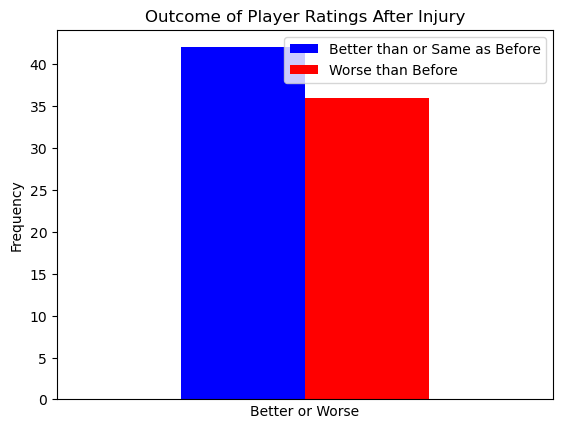

In [68]:
better = latest_season[latest_season['Average Rating After Injury'] >= latest_season['Average Rating Before Injury']].shape[0]
worse = latest_season[latest_season['Average Rating After Injury'] < latest_season['Average Rating Before Injury']].shape[0]

average_rating_output = pd.DataFrame({
    'Better than or Same as Before': [better],
    'Worse than Before': [worse]
})

plt.figure(figsize=(20, 15))
average_rating_output.plot(kind='bar', stacked=False, color=['blue', 'red'])

plt.ylabel('Frequency')
plt.xlabel('Better or Worse')
plt.xticks([])
plt.title('Outcome of Player Ratings After Injury')
plt.show()

In [69]:
callum = injury_age1[injury_age1['Name'] == 'Callum Wilson']

In [159]:
callum.loc[callum.index[:5], 'Injury Number'] = [1, 2, 3, 4, 5]

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


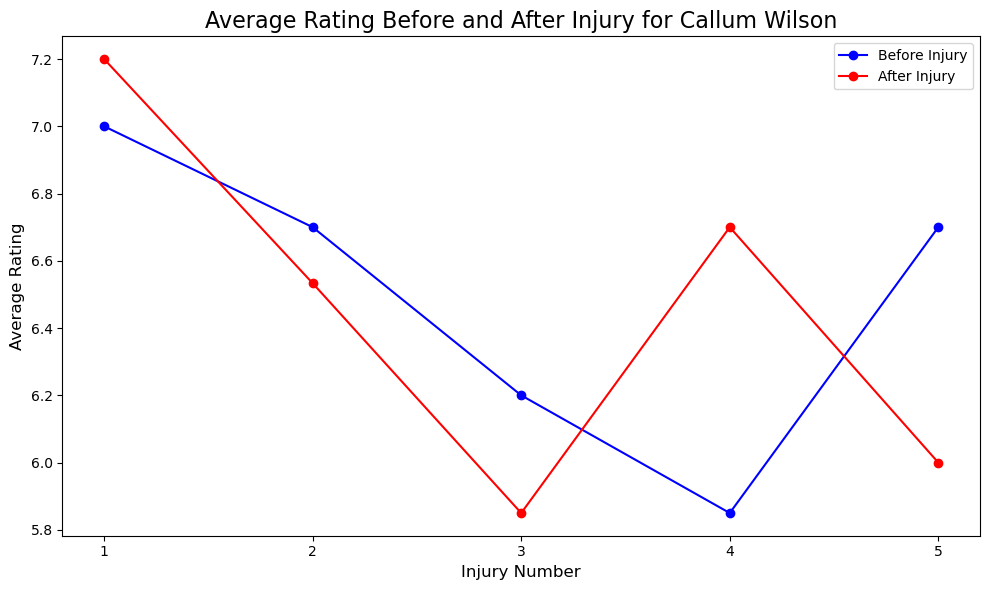

In [161]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot "Before Injury" ratings
plt.plot(callum['Injury Number'], callum['Average Rating Before Injury'], label='Before Injury', marker='o', color='blue')

# Plot "After Injury" ratings
plt.plot(callum['Injury Number'], callum['Average Rating After Injury'], label='After Injury', marker='o', color='red')

# Adding labels and title
plt.title('Average Rating Before and After Injury for Callum Wilson', fontsize=16)
plt.xlabel('Injury Number', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(range(1, 6))  # Assuming injury numbers range from 1 to 5
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

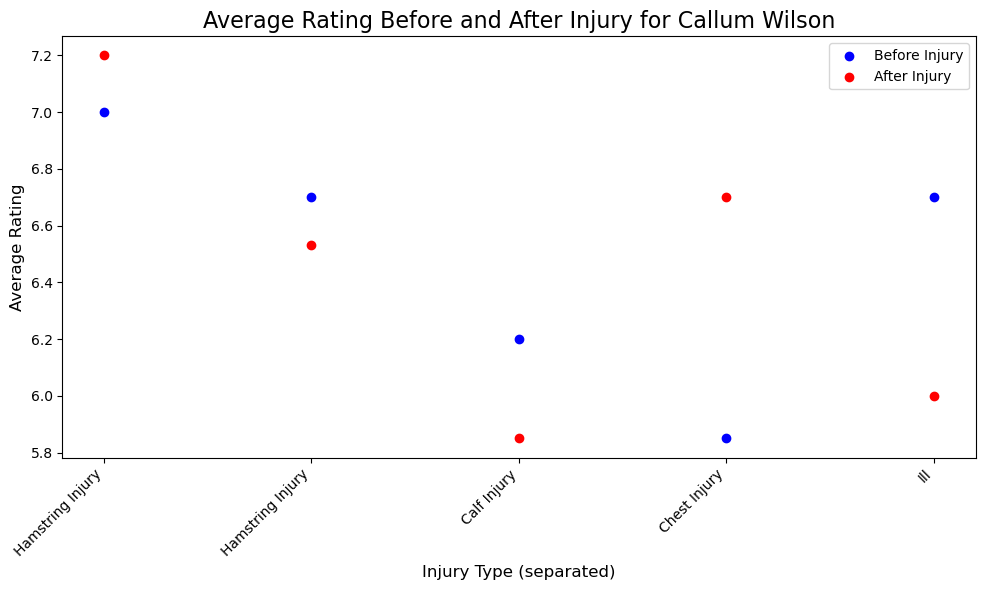

In [72]:
# Plotting the data
plt.figure(figsize=(10, 6))

# To separate each injury occurrence, create a position for each injury occurrence
injury_positions = range(len(callum))

# Plot "Before Injury" ratings with separate positions for each occurrence
plt.scatter(injury_positions, callum['Average Rating Before Injury'], label='Before Injury', color='blue', marker='o')

# Plot "After Injury" ratings with separate positions for each occurrence
plt.scatter(injury_positions, callum['Average Rating After Injury'], label='After Injury', color='red', marker='o')

# Adding labels and title
plt.title('Average Rating Before and After Injury for Callum Wilson', fontsize=16)
plt.xlabel('Injury Type (separated)', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Create custom labels for each injury type, repeat labels as needed
xticks_labels = [f"{injury}" for injury in callum['Injury']]
plt.xticks(injury_positions, xticks_labels, rotation=45, ha="right")

# Adding a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [73]:
sven = injury_age2[injury_age2['Name'] == 'Sven Botman']

In [74]:
sven.loc[sven.index[:3], 'Injury Number'] = [1, 2, 3]

/var/folders/cl/t0tgh5md7pj6srx85p45398h0000gq/T/ipykernel_7634/303519766.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



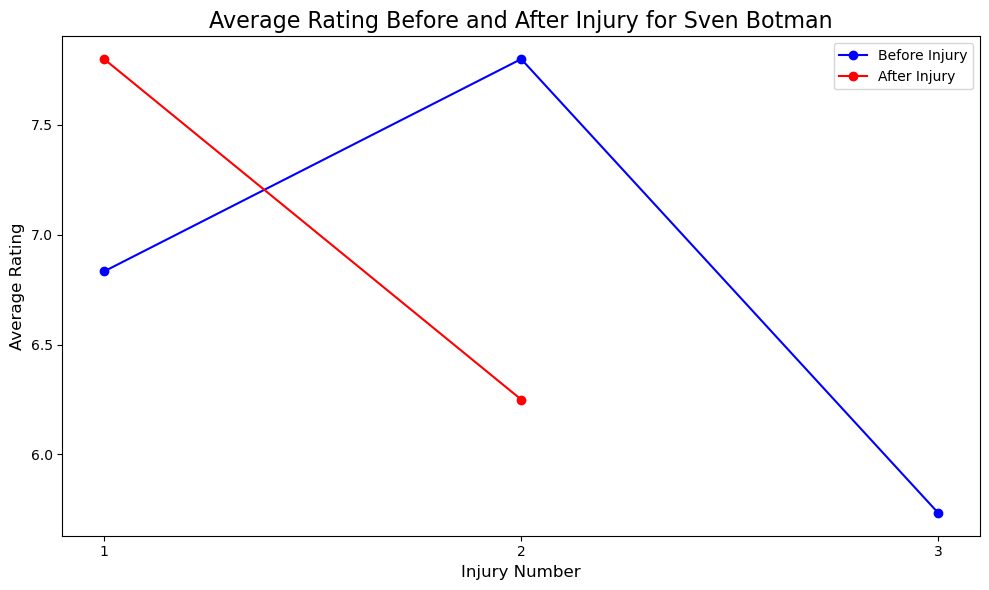

In [75]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot "Before Injury" ratings
plt.plot(sven['Injury Number'], sven['Average Rating Before Injury'], label='Before Injury', marker='o', color='blue')

# Plot "After Injury" ratings
plt.plot(sven['Injury Number'], sven['Average Rating After Injury'], label='After Injury', marker='o', color='red')

# Adding labels and title
plt.title('Average Rating Before and After Injury for Sven Botman', fontsize=16)
plt.xlabel('Injury Number', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(range(1, 4))  # Assuming injury numbers range from 1 to 5
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

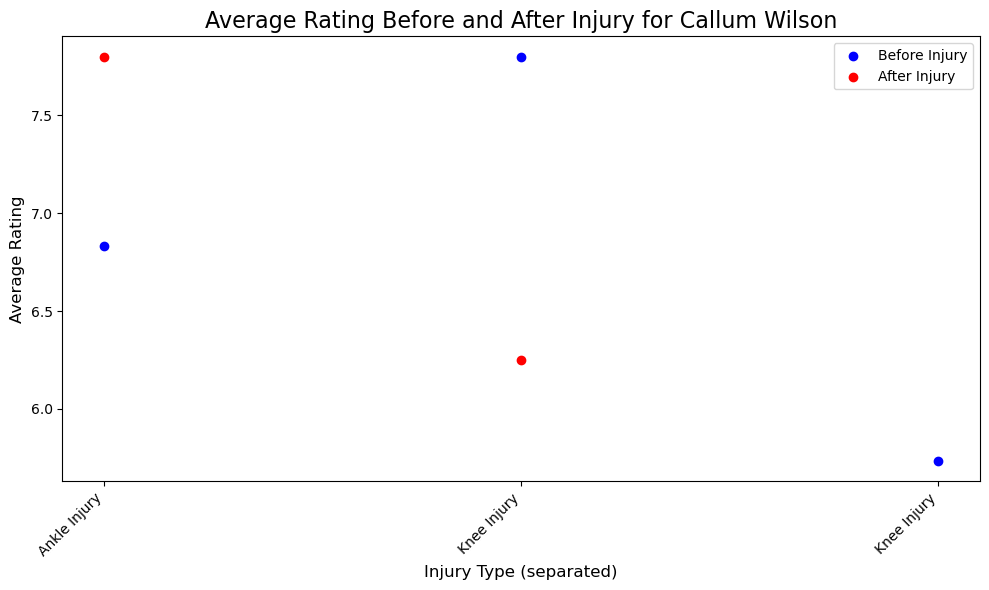

In [76]:
# Plotting the data
plt.figure(figsize=(10, 6))

# To separate each injury occurrence, create a position for each injury occurrence
injury_positions = range(len(sven))

# Plot "Before Injury" ratings with separate positions for each occurrence
plt.scatter(injury_positions, sven['Average Rating Before Injury'], label='Before Injury', color='blue', marker='o')

# Plot "After Injury" ratings with separate positions for each occurrence
plt.scatter(injury_positions, sven['Average Rating After Injury'], label='After Injury', color='red', marker='o')

# Adding labels and title
plt.title('Average Rating Before and After Injury for Callum Wilson', fontsize=16)
plt.xlabel('Injury Type (separated)', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Create custom labels for each injury type, repeat labels as needed
xticks_labels = [f"{injury}" for injury in sven['Injury']]
plt.xticks(injury_positions, xticks_labels, rotation=45, ha="right")

# Adding a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [77]:
apr_before=go.Scatter(
    x=latest_season['Age'],
    y=latest_season['Average Rating Before Injury'],
    name='Before Injury',
    mode='markers',
    marker=dict(color='#195905'),  # Color for this scatter
    text=latest_season['Name']
)

sp1 = go.Figure(apr_before)


sp1.update_layout(
    title='Average Player Rating Before Injury',
    yaxis_title='Player Rating',
    width=600,  # Set the width of the figure (in pixels)
    height=600,  # Set the height of the figure (in pixels)
)

# Show
sp1.show()

In [78]:
apr_after = go.Scatter(
    x=latest_season['Age'],
    y=latest_season['Average Rating After Injury'],
    name='After Injury',
    mode='markers',
    marker=dict(color='#ab82ff'),  # Color for this scatter
    text=latest_season['Name']
)

sp2 = go.Figure(apr_after)


sp2.update_layout(
    title='Average Player Rating Before and After Injury',
    yaxis_title='Player Rating',
    width=600,  # Set the width of the figure (in pixels)
    height=600,  # Set the height of the figure (in pixels)
)

# Show
sp2.show()

In [79]:
apr_1 = go.Scatter(
    x=latest_season['Age'],
    y=latest_season['Average Rating Before Injury'],
    name='Before Injury',
    mode='markers',
    marker=dict(color='#195905'),  # Color for this scatter
    text=latest_season['Name']
)

apr_2 = go.Scatter(
    x=latest_season['Age'],
    y=latest_season['Average Rating After Injury'],
    name='After Injury',
    mode='markers',
    marker=dict(color='#ab82ff'),  # Color for this scatter
    text=latest_season['Name']
)

sp3 = go.Figure(data=[apr_1, apr_2])


sp3.update_layout(
    title='Average Player Rating Before and After Injury',
    yaxis_title='Player Rating',
    xaxis_title='Age',
    width=600,  # Set the width of the figure (in pixels)
    height=600,  # Set the height of the figure (in pixels)
)

# Show
sp3.show()

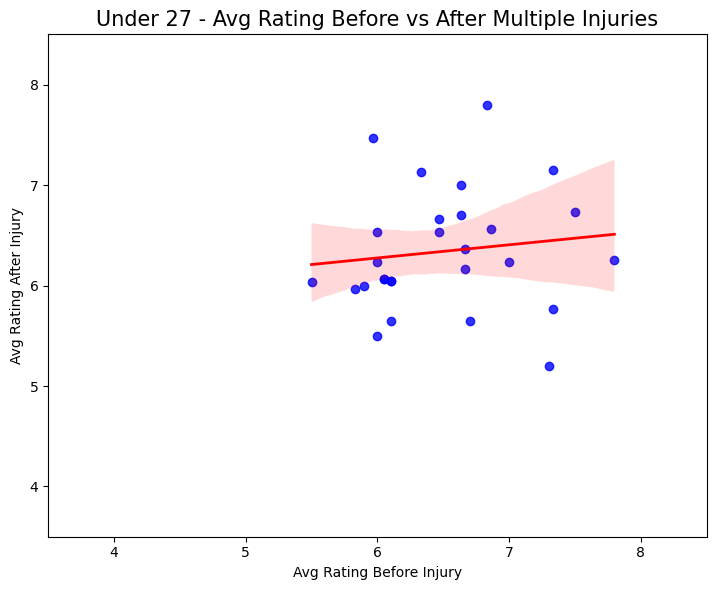

In [80]:
# Create scatter plots for both age groups
plt.figure(figsize=(14, 6))

# Scatter plot for under 27 years old with a regression line
plt.subplot(1, 2, 1)
sns.regplot(x='Average Rating Before Injury', y='Average Rating After Injury', data=under_27, 
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red', 'linewidth': 2})

# Set the title, labels, and adjust the scale/range for the axes
plt.title('Under 27 - Avg Rating Before vs After Multiple Injuries', fontsize=15)
plt.xlabel('Avg Rating Before Injury')
plt.ylabel('Avg Rating After Injury')

# Set the scale/range for the x and y axes
plt.xlim(3.5, 8.5)  # Adjust the x-axis range, for example, from 0 to 10
plt.ylim(3.5, 8.5)  # Adjust the y-axis range, for example, from 0 to 10

# Show the plot
plt.tight_layout()
plt.show()


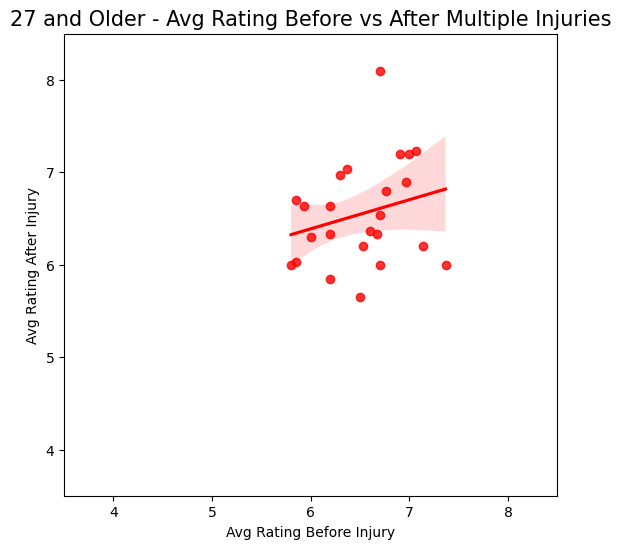

In [81]:
# Create scatter plots for both age groups
plt.figure(figsize=(14, 6))

# Scatter plot for 27 and older
plt.subplot(1, 2, 2)
sns.regplot(x='Average Rating Before Injury', y='Average Rating After Injury', data=above_27, color='red')
plt.title('27 and Older - Avg Rating Before vs After Multiple Injuries', fontsize=15)
plt.xlabel('Avg Rating Before Injury')
plt.ylabel('Avg Rating After Injury')

plt.xlim(3.5, 8.5)  # Adjust the x-axis range, for example, from 0 to 10
plt.ylim(3.5, 8.5)  # Adjust the y-axis range, for example, from 0 to 10

# Show the plot
plt.show()

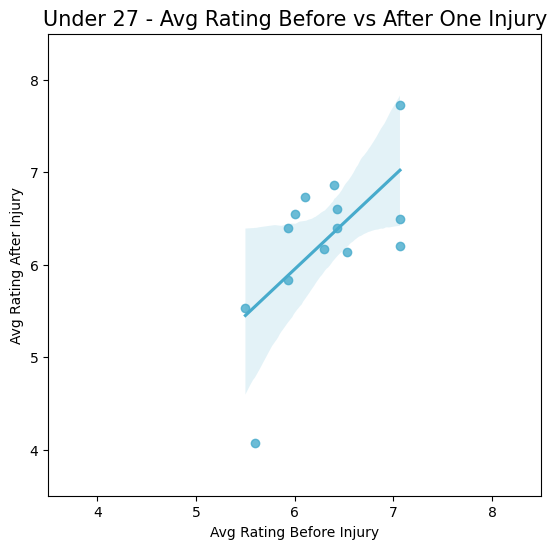

In [82]:
# Create scatter plots for both age groups
plt.figure(figsize=(14, 6))

# Scatter plot for 27 and older
plt.subplot(1, 2, 2)
sns.regplot(x='Average Rating Before Injury', y='Average Rating After Injury', data=one_under_27, color='#47abcc')
plt.title('Under 27 - Avg Rating Before vs After One Injury', fontsize=15)
plt.xlabel('Avg Rating Before Injury')
plt.ylabel('Avg Rating After Injury')

plt.xlim(3.5, 8.5)  # Adjust the x-axis range, for example, from 0 to 10
plt.ylim(3.5, 8.5)  # Adjust the y-axis range, for example, from 0 to 10

# Show the plot
plt.show()

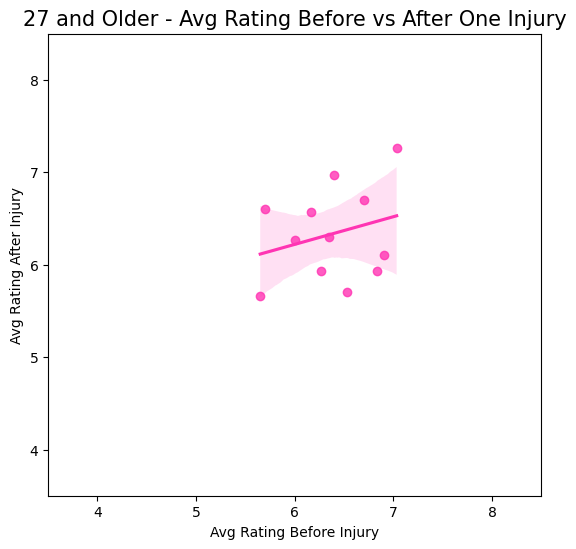

In [83]:
# Create scatter plots for both age groups
plt.figure(figsize=(14, 6))

# Scatter plot for 27 and older
plt.subplot(1, 2, 2)
sns.regplot(x='Average Rating Before Injury', y='Average Rating After Injury', data=one_above_27, color='#ff34b3')
plt.title('27 and Older - Avg Rating Before vs After One Injury', fontsize=15)
plt.xlabel('Avg Rating Before Injury')
plt.ylabel('Avg Rating After Injury')

plt.xlim(3.5, 8.5)  # Adjust the x-axis range, for example, from 0 to 10
plt.ylim(3.5, 8.5)  # Adjust the y-axis range, for example, from 0 to 10

# Show the plot
plt.show()

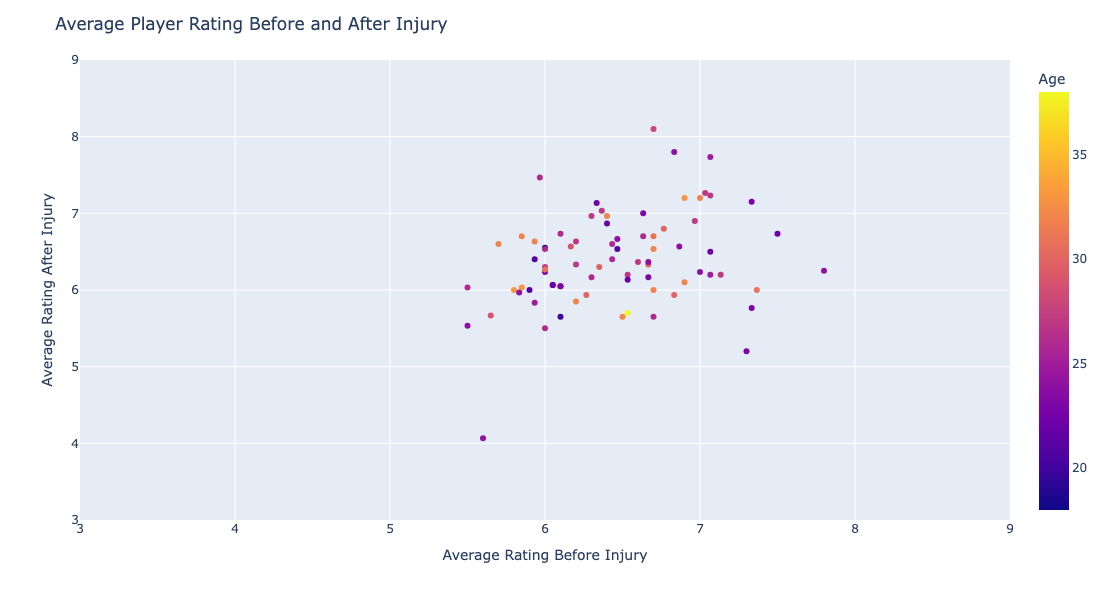

In [84]:
sp = px.scatter(latest_season, x="Average Rating Before Injury", 
                y="Average Rating After Injury", 
                color='Age', hover_name='Name')

sp.update_layout(
    title='Average Player Rating Before and After Injury',
    width=600,  # Set the width of the figure (in pixels)
    height=600,  # Set the height of the figure (in pixels)
    xaxis=dict(range=[3, 9]),  # Adjust the x-axis range (modify as needed)
    yaxis=dict(range=[3, 9])   # Adjust the y-axis range (modify as needed)
)

sp.show()

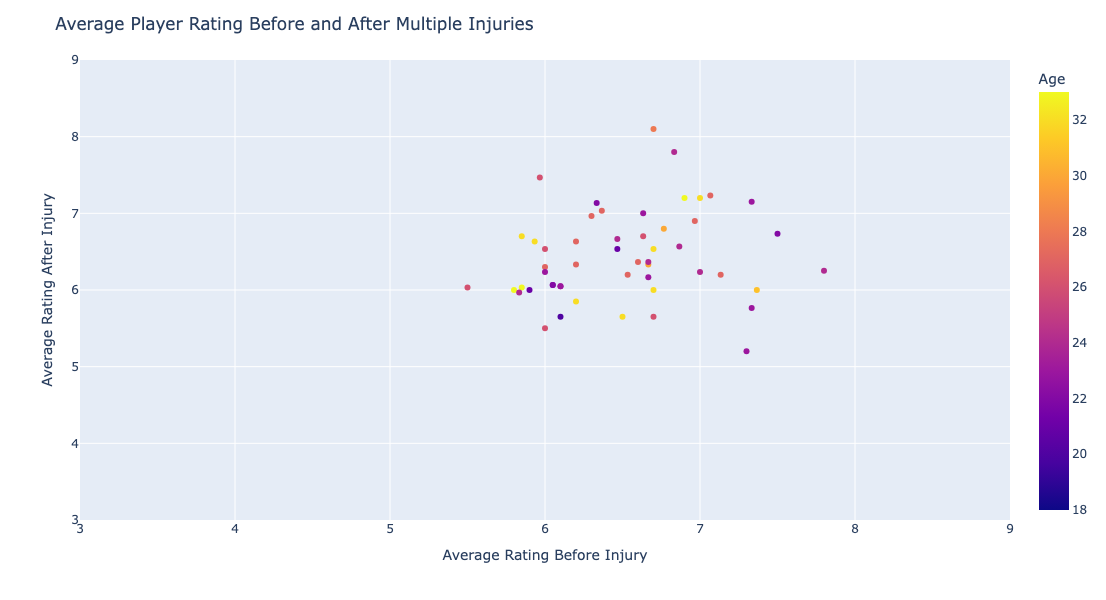

In [85]:
sp = px.scatter(more_than_one_injury, x="Average Rating Before Injury", 
                y="Average Rating After Injury", 
                color='Age', hover_name='Name')

sp.update_layout(
    title='Average Player Rating Before and After Multiple Injuries',
    width=600,  # Set the width of the figure (in pixels)
    height=600,  # Set the height of the figure (in pixels)
    xaxis=dict(range=[3, 9]),  # Adjust the x-axis range (modify as needed)
    yaxis=dict(range=[3, 9])   # Adjust the y-axis range (modify as needed)
)

sp.show()

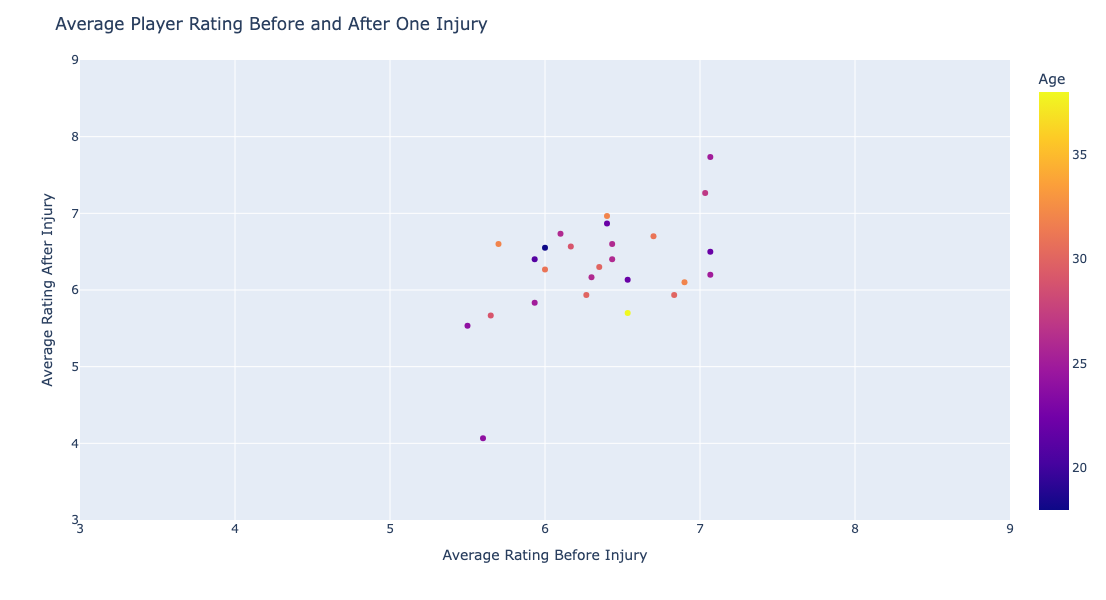

In [86]:
sp = px.scatter(one_injury, x="Average Rating Before Injury", 
                y="Average Rating After Injury", 
                color='Age', hover_name='Name')

sp.update_layout(
    title='Average Player Rating Before and After One Injury',
    width=600,  # Set the width of the figure (in pixels)
    height=600,  # Set the height of the figure (in pixels)
    xaxis=dict(range=[3, 9]),  # Adjust the x-axis range (modify as needed)
    yaxis=dict(range=[3, 9])   # Adjust the y-axis range (modify as needed)
)

sp.show()

[Back to Table of Contents](#toc)